In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
dataset = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
dataset

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset

In [ ]:
imagens_treino.shape # para treino

(60000, 28, 28)

In [ ]:
imagens_teste.shape # para teste

(10000, 28, 28)

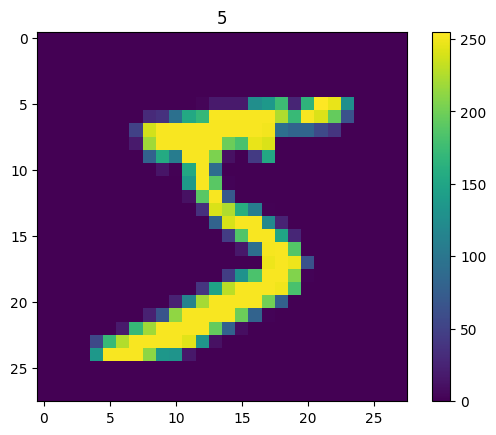

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
plt.colorbar()

In [ ]:
# Normalização

imagens_treino = imagens_treino / 255

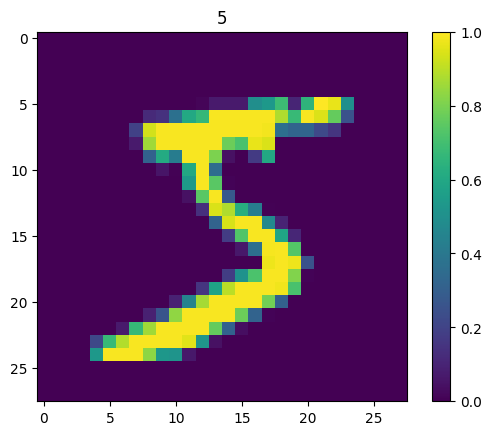

In [ ]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
plt.colorbar()

In [ ]:
# criar modelo

modelo = keras.Sequential([
  keras.layers.Flatten(input_shape = (28, 28)), # entrada
  keras.layers.Dense(256, activation = tf.nn.relu), # processamento
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation = tf.nn.softmax) # saida
  ])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 3, validation_split = 0.2)

Epoch 1/3
1500/1500 [==============================] - 28s 16ms/step - loss: 0.2764 - accuracy: 0.9195 - val_loss: 0.1469 - val_accuracy: 0.9558
Epoch 2/3
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1274 - accuracy: 0.9617 - val_loss: 0.1013 - val_accuracy: 0.9699
Epoch 3/3
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0908 - accuracy: 0.9723 - val_loss: 0.0919 - val_accuracy: 0.9725


In [ ]:
historico.history

{'loss': [0.27638518810272217, 0.1273779720067978, 0.09082387387752533],
 'accuracy': [0.9194583296775818, 0.9617499709129333, 0.9722708463668823],
 'val_loss': [0.14693759381771088, 0.10132228583097458, 0.09189873933792114],
 'val_accuracy': [0.9558333158493042, 0.9699166417121887, 0.9725000262260437]}

Text(0.5, 0, 'epochs')

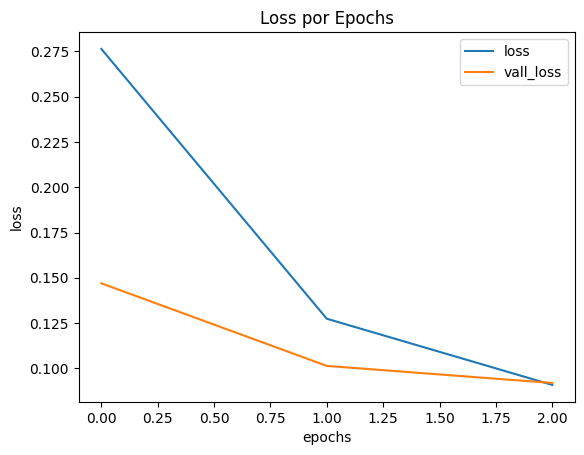

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss', 'vall_loss'])
plt.title('Loss por Epochs')
plt.ylabel('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

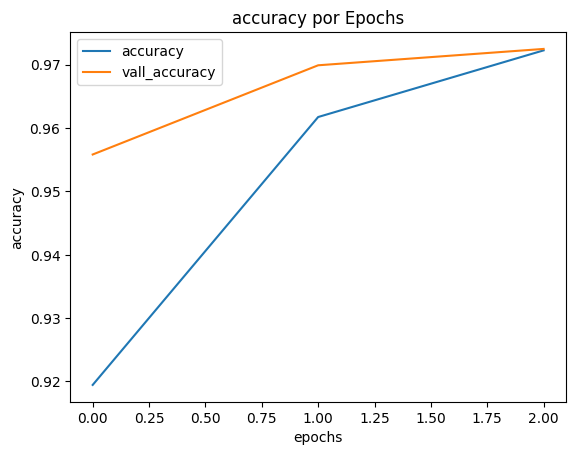

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['accuracy', 'vall_accuracy'])
plt.title('accuracy por Epochs')
plt.ylabel('accuracy')
plt.xlabel('epochs')

In [ ]:
# Salvar Modelo
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')

In [ ]:
# Carregar Modelo
modelo_salvo = load_model('modelo.h5') # carregar modelo

In [ ]:
# Testar Modelo
testes = modelo.predict(imagens_teste)
testes [0] # exem quero testar a imagem 0

313/313 [==============================] - 2s 6ms/step


Text(0.5, 1.0, '7')

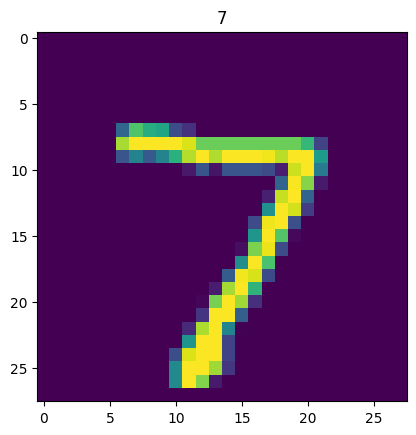

In [ ]:
import numpy as np

resultado = np.argmax(testes[0])

plt.imshow(imagens_teste[0])
plt.title(resultado)